# 3.2 活性化関数

In [96]:
import numpy as np

def step_function(x):
    y = (x > 0)
    return y.astype(np.int)

In [8]:
step_function(np.array([0]))

array([0])

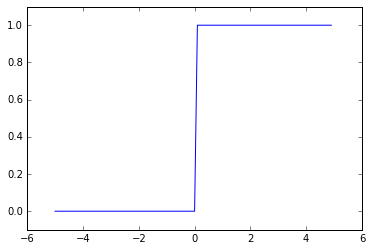

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

def step_function(x):
    return np.array(x>0,dtype=np.int)

x = np.arange(-5,5,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim([-0.1,1.1])
plt.show()

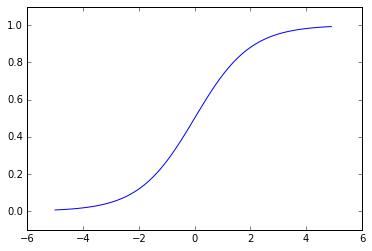

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
y = sigmoid(x)
plt.plot(x,y)
plt.ylim([-0.1,1.1])
plt.show()

- ReLU関数は最近の活性化関数のトレンド

In [14]:
def relu(x):
    return np.maximum(0,x)

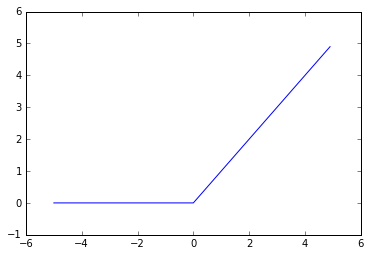

In [20]:
plt.plot(x,relu(x))
plt.ylim([-1,6])
plt.show()

## 3.3.3 ニューラルネットワークの内積

In [58]:
X = np.array([1,2])
print(X.shape)
W = np.array([[1,3,5],[2,4,6]])
print(W.shape)
Y = np.dot(X,W)
print(Y)

(2,)
(2, 3)
[ 5 11 17]


In [62]:
#入力層から第１層
X = np.array([1.,0.5])
W1 = np.array([[0.1,0.3,0.5],
       [0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X,W1) + B1

(2, 3)
(2,)
(3,)


In [63]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[ 0.3  0.7  1.1]
[ 0.57444252  0.66818777  0.75026011]


In [66]:
#第一層から第二層
W2 = np.array([[0.1,0.4],
               [0.2,0.5],
               [0.3,0.6]])
B2 = np.array([0.1,0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [67]:
#第二層から出力層
def idenity_function(x):
    return x

W3 = np.array([[0.1,0.3],
               [0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3) + B3
Y = idenity_function(A3)

In [69]:
#ソフトマックス関数
a = np.array([0.3,2.9,4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[  1.34985881  18.17414537  54.59815003]
74.1221542102
[ 0.01821127  0.24519181  0.73659691]


In [70]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [72]:
#オーバーフロー対策
a = np.array([1010,1000,990])
print(np.exp(a) / np.sum(np.exp(a)))

c = np.max(a)
print(a - c)

print np.exp(a - c) / np.sum(np.exp(a - c))

[ nan  nan  nan]
[  0 -10 -20]
[  9.99954600e-01   4.53978686e-05   2.06106005e-09]


/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


In [73]:
#対策済みソフトマックス関数
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [80]:
import pandas as pd

train = pd.read_csv('/home/kyohei/kaggle_data/02digit_recognizer/train.csv')
test = pd.read_csv('/home/kyohei/kaggle_data/02digit_recognizer/test.csv')

In [83]:
X_train = train.iloc[:,1:].values
t_train = train.iloc[:,0].values
X_test = test.iloc[:,1:].values
t_test = test.iloc[:,0].values

In [85]:
print X_train.shape
print t_train.shape
print X_test.shape
print t_test.shape

(42000, 784)
(42000,)
(28000, 783)
(28000,)


0
(784,)
(28, 28)


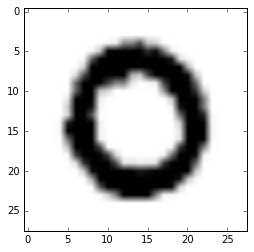

In [100]:
%matplotlib inline
from PIL import Image
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    plt.imshow(img,cmap='Greys')

img = X_train[1]
label = t_train[1]
print(label)

print(img.shape)
img = img.reshape(28,28)
print(img.shape)

img_show(img)

In [ ]:
#ニューラルネットワーク

In [104]:
import pickle
with open('/home/kyohei/deep-learning-from-scratch/ch03/sample_weight.pkl','rb') as f:
    network = pickle.load(f)

ValueError: unsupported pickle protocol: 3